In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
df=pd.read_excel('Customer Churn Data1.xlsx',sheet_name='raj')

In [3]:
df

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,31255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,153.71,Computer
11256,31256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,226.91,Mobile
11257,31257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191.42,Mobile
11258,31258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,179.9,Computer


In [4]:
df.shape

(11260, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [6]:
df.dtypes

AccountID                    int64
Churn                        int64
Tenure                      object
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count          object
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

In [7]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [8]:
columns_all = df.columns
columns_all

Index(['AccountID', 'Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY',
       'Payment', 'Gender', 'Service_Score', 'Account_user_count',
       'account_segment', 'CC_Agent_Score', 'Marital_Status', 'rev_per_month',
       'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback', 'Login_device'],
      dtype='object')

In [9]:
categorical_feature = df.select_dtypes(include=['object']).columns #select categorical column
categorical_feature

Index(['Tenure', 'Payment', 'Gender', 'Account_user_count', 'account_segment',
       'Marital_Status', 'rev_per_month', 'rev_growth_yoy',
       'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback',
       'Login_device'],
      dtype='object')

In [10]:
for feature in categorical_feature:
    mode = df[feature].mode().values[0]
    df[feature].fillna(mode, inplace=True)

In [11]:
numerical_features = [col for col in columns_all if col not in categorical_feature] #select numerical column
numerical_features

['AccountID',
 'Churn',
 'City_Tier',
 'CC_Contacted_LY',
 'Service_Score',
 'CC_Agent_Score',
 'Complain_ly']

In [12]:
# Impute null values with the median
for feature in numerical_features:
    median = df[feature].median()
    df[feature].fillna(median, inplace=True)

In [13]:
df.isnull().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [14]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AccountID,11260.0,NaN,NaN,NaN,25629.5,3250.62635,20000.0,22814.75,25629.5,28444.25,31259.0
Churn,11260.0,NaN,NaN,NaN,0.168384,0.374223,0.0,0.0,0.0,0.0,1.0
Tenure,11260.0,38.0,1.0,1453.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City_Tier,11260.0,NaN,NaN,NaN,1.647425,0.912763,1.0,1.0,1.0,3.0,3.0
CC_Contacted_LY,11260.0,NaN,NaN,NaN,17.850178,8.814851,4.0,11.0,16.0,23.0,132.0
Payment,11260,5,Debit Card,4696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,11260,4,Male,6436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,11260.0,NaN,NaN,NaN,2.903375,0.722476,0.0,2.0,3.0,3.0,5.0
Account_user_count,11260.0,7.0,4.0,4681.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_segment,11260,7,Super,4159,NaN,NaN,NaN,NaN,NaN,NaN,NaN


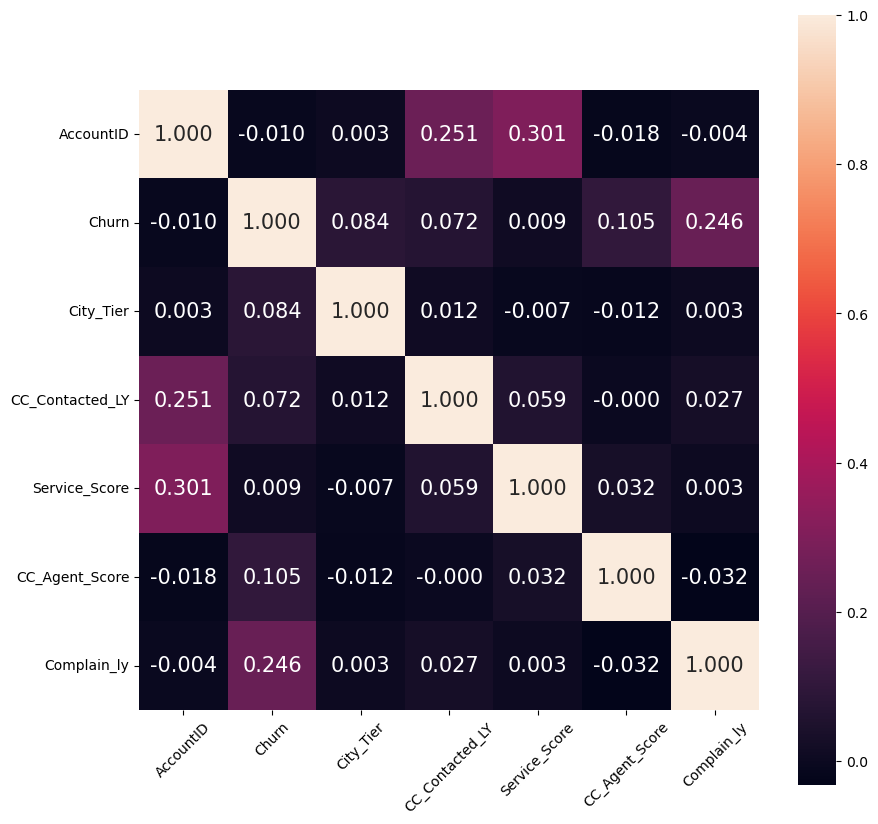

In [15]:
cm = np.corrcoef(df[numerical_features].values.T)

plt.figure(figsize=(10, 10))
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.3f',
                 annot_kws={'size': 15},
                 xticklabels=numerical_features,  # Set x-axis labels
                 yticklabels=numerical_features)  # Set y-axis labels

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.show()

In [16]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

TENURE :  38
Tenure
61       2
50       2
51       2
60       2
31      96
29     114
25     114
#      116
26     122
99     131
27     131
30     137
28     137
24     147
22     151
23     169
21     170
17     215
20     217
18     253
19     273
16     291
15     311
14     345
2      354
13     359
12     360
6      363
11     388
4      403
5      403
3      410
10     423
7      450
9      496
8      519
0     1231
1     1453
Name: count, dtype: int64


PAYMENT :  5
Payment
UPI                  822
Cash on Delivery    1014
E wallet            1217
Credit Card         3511
Debit Card          4696
Name: count, dtype: int64


GENDER :  4
Gender
F          270
M          376
Female    4178
Male      6436
Name: count, dtype: int64


ACCOUNT_USER_COUNT :  7
Account_user_count
6     315
@     332
1     446
2     526
5    1699
3    3261
4    4681
Name: count, dtype: int64


ACCOUNT_SEGMENT :  7
account_segment
Super +           47
Regular +        262
Regular          520
Super Plus  

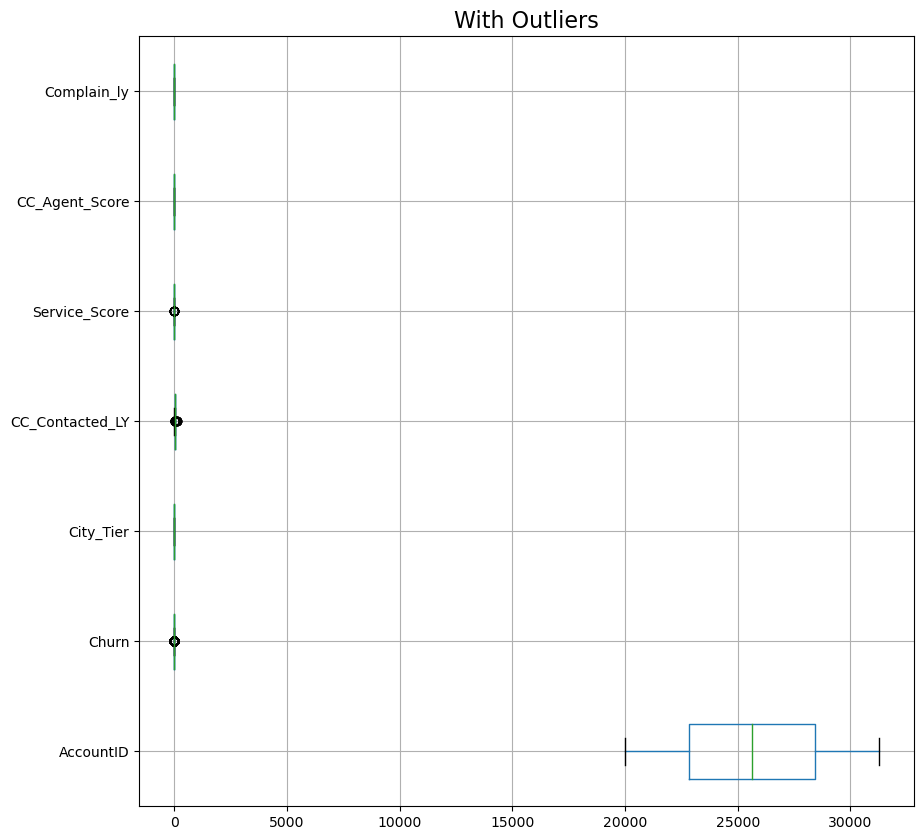

In [17]:
# construct box plot for continuous variables
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [18]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [19]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[numerical_features])
    df[numerical_features]=np.where(df[numerical_features]>ur,ur,df[numerical_features])
    df[numerical_features]=np.where(df[numerical_features]<lr,lr,df[numerical_features])

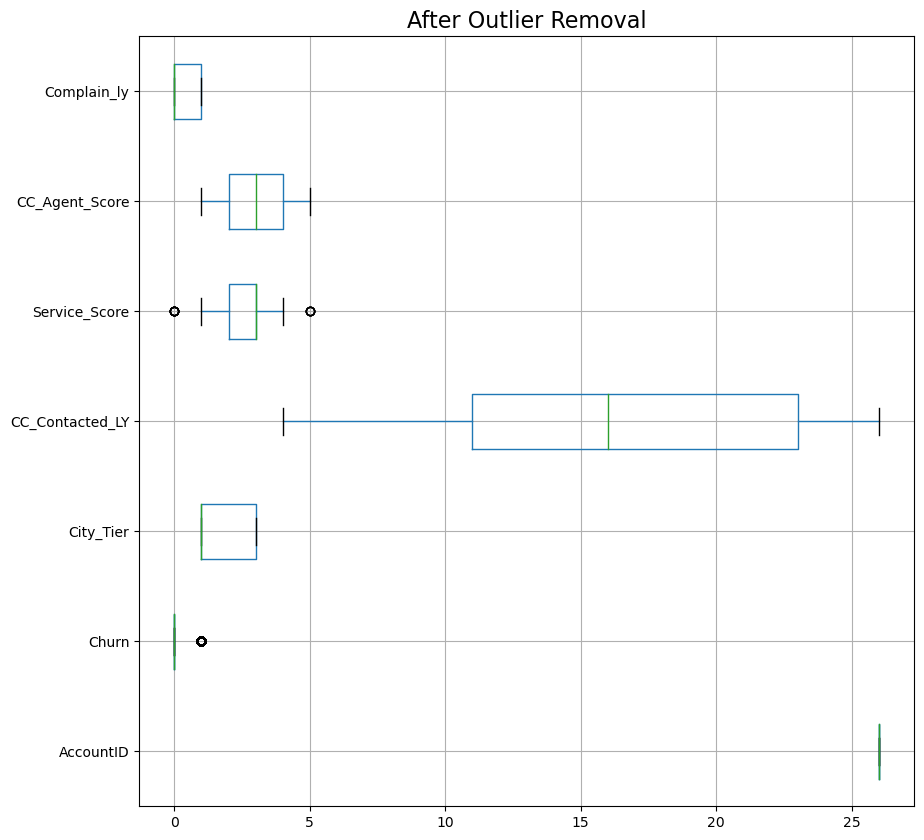

In [20]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

C:\Users\raj28\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


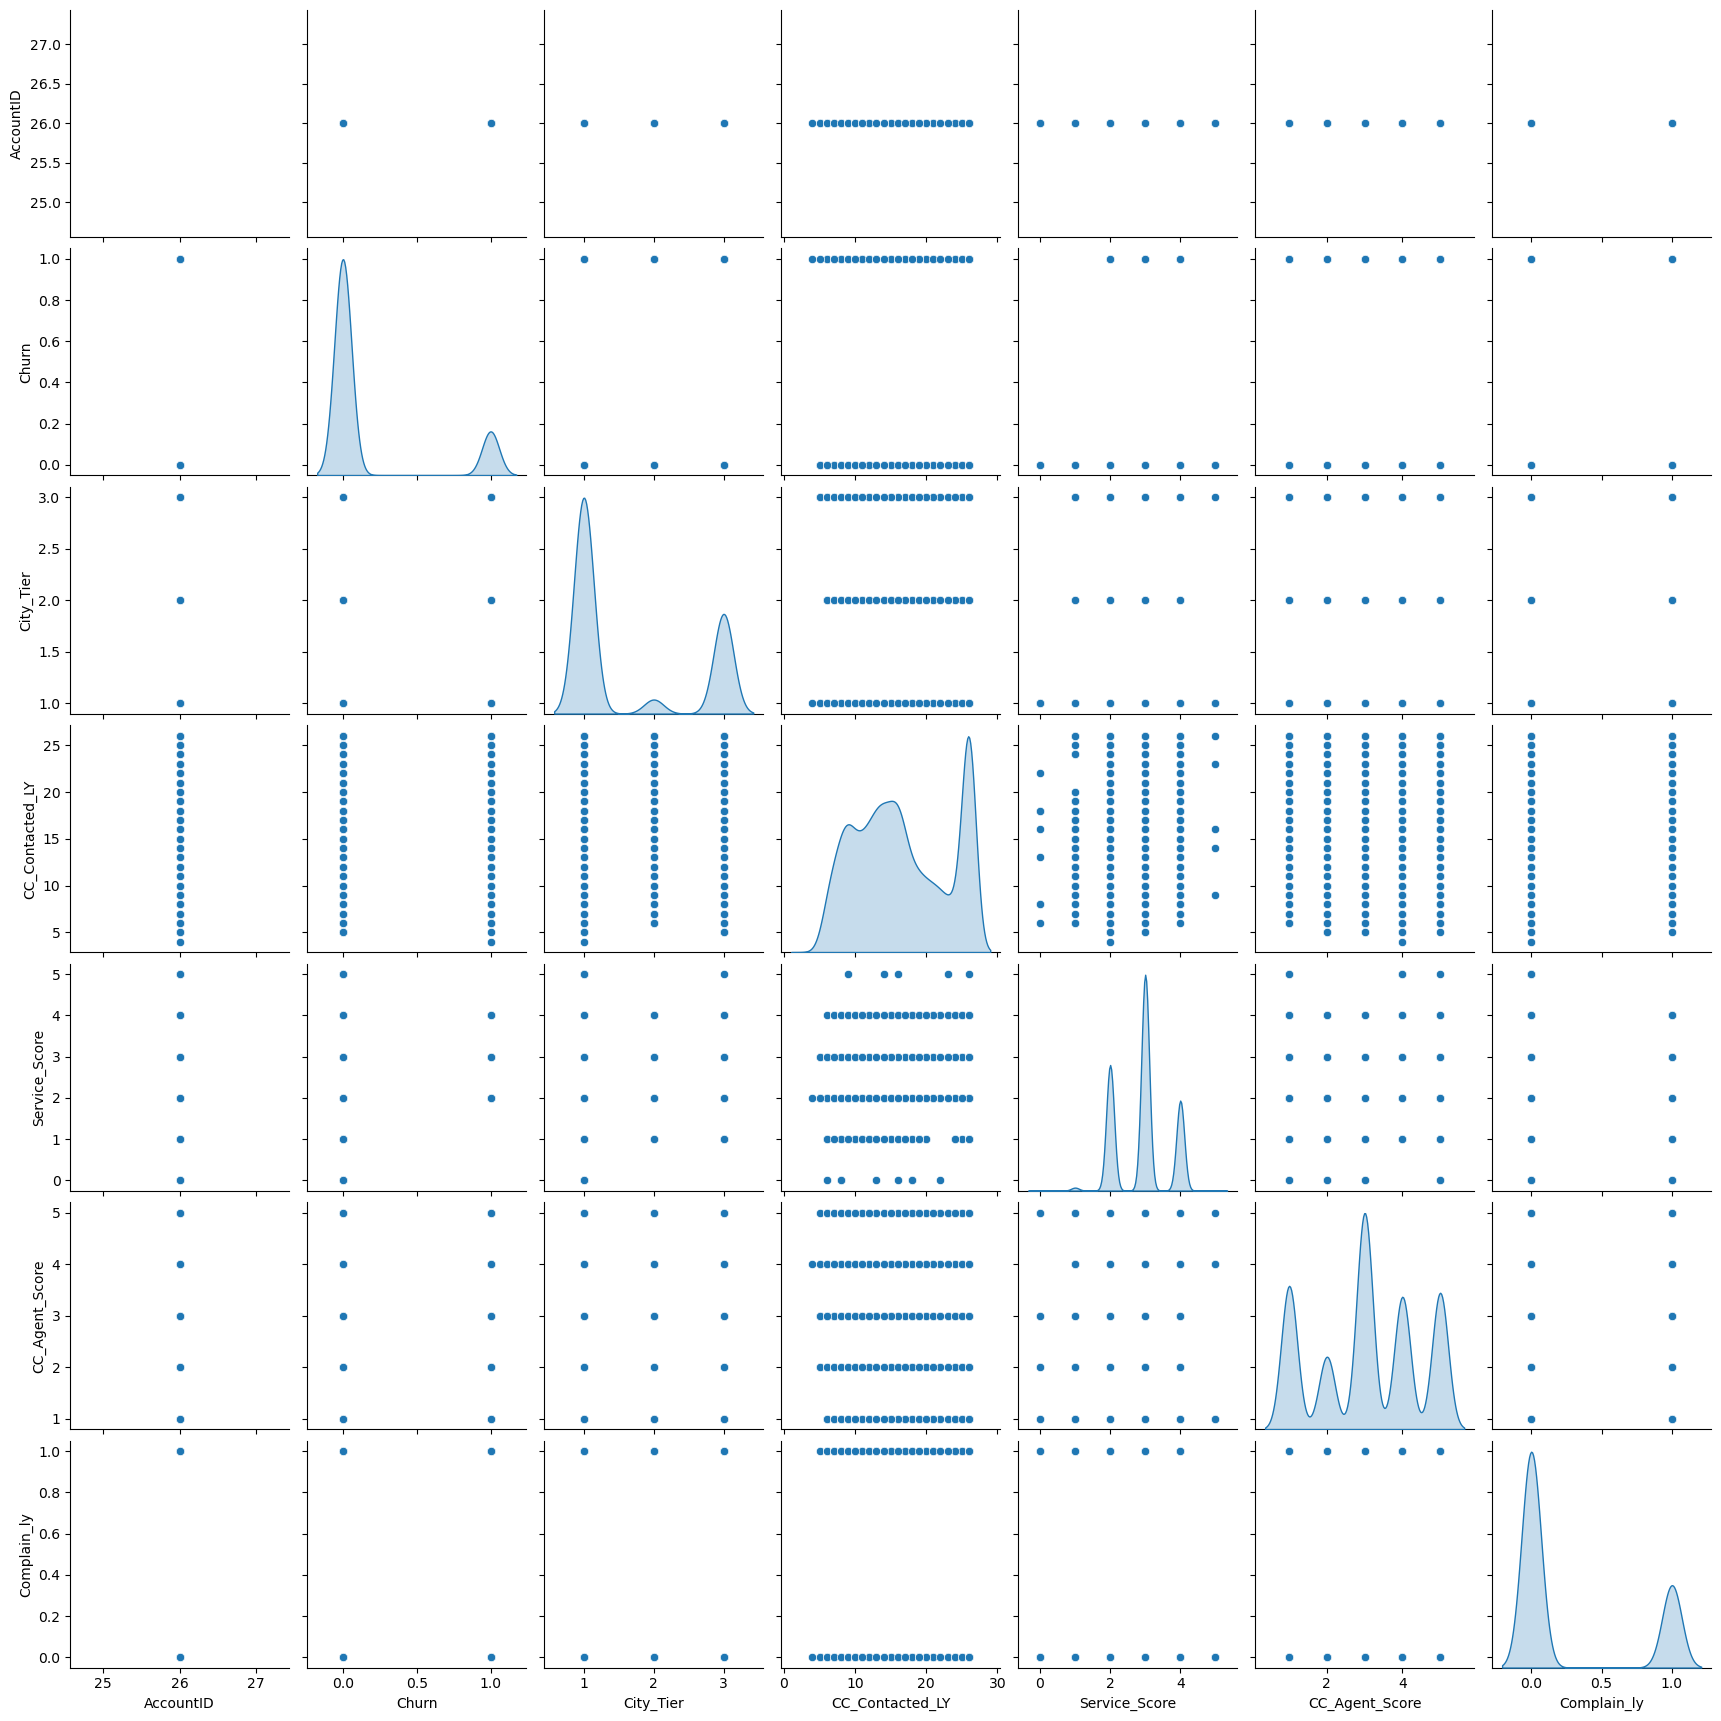

In [21]:
df_attr = (df[cont])
sns.pairplot(df_attr, diag_kind='kde')  
plt.show()

In [22]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Tenure
[4, 0, 2, 13, 11, ..., 50, 60, 31, 51, 61]
Length: 38
Categories (38, object): [0, 1, 2, 3, ..., 60, 61, 99, '#']
[ 4  0  2 13 11 37  9 36 19 20 14  8 26 18  5 30  7  1 23  3 29  6 28 24
 25 16 10 15 22 27 12 21 17 32 34 31 33 35]


feature: Payment
['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet']
Categories (5, object): ['Cash on Delivery', 'Credit Card', 'Debit Card', 'E wallet', 'UPI']
[2 4 1 0 3]


feature: Gender
['Female', 'Male', 'F', 'M']
Categories (4, object): ['F', 'Female', 'M', 'Male']
[1 3 0 2]


feature: Account_user_count
[3, 4, 5, 2, '@', 1, 6]
Categories (7, object): [1, 2, 3, 4, 5, 6, '@']
[2 3 4 1 6 0 5]


feature: account_segment
['Super', 'Regular Plus', 'Regular', 'HNI', 'Regular +', 'Super Plus', 'Super +']
Categories (7, object): ['HNI', 'Regular', 'Regular +', 'Regular Plus', 'Super', 'Super +', 'Super Plus']
[4 3 1 0 2 6 5]


feature: Marital_Status
['Single', 'Divorced', 'Married']
Categories (3, object): ['Divorced', 'M

In [23]:
df

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,26.0,1.0,4,3.0,6.0,2,1,3.0,2,4,2.0,2,8,1.0,1,1,5,2222,2
1,26.0,1.0,0,1.0,8.0,4,3,3.0,3,3,3.0,2,6,1.0,5,0,0,109,2
2,26.0,1.0,0,1.0,26.0,2,3,2.0,3,3,3.0,2,5,1.0,4,0,3,1949,2
3,26.0,1.0,0,3.0,15.0,2,3,2.0,3,4,5.0,2,7,0.0,13,0,3,748,2
4,26.0,1.0,0,1.0,12.0,1,3,2.0,2,3,5.0,2,2,0.0,1,1,3,552,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,26.0,0.0,10,1.0,26.0,1,3,3.0,1,4,1.0,1,8,0.0,9,1,4,1810,1
11256,26.0,0.0,13,1.0,19.0,1,3,3.0,4,0,5.0,1,6,0.0,6,1,8,4481,2
11257,26.0,0.0,1,1.0,14.0,2,3,3.0,1,4,4.0,1,6,1.0,12,1,4,3680,2
11258,26.0,0.0,23,3.0,11.0,1,3,4.0,4,4,4.0,1,6,0.0,6,2,9,3244,1


In [24]:
X = df.drop(["Churn"], axis=1)

Y= df["Churn"]
X.shape,Y.shape

((11260, 18), (11260,))

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [27]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('Y_train',Y_train.shape)
print('Y_test',Y_test.shape)

X_train (7882, 18)
X_test (3378, 18)
Y_train (7882,)
Y_test (3378,)


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix


In [29]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [10],
    'min_samples_leaf': [250],
    'min_samples_split': [750]
}

dtcl = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [30]:
grid_search.fit(X_train, Y_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 250, 'min_samples_split': 750}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=250,
                       min_samples_split=750)

In [31]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [32]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.957792,0.042208
1,0.870112,0.129888
2,0.437173,0.562827
3,0.957792,0.042208
4,0.897106,0.102894


In [33]:
confusion_matrix(Y_train, ytrain_predict)

array([[6189,  352],
       [ 643,  698]], dtype=int64)

In [34]:
churn_train_acc=best_grid.score(X_train,Y_train) 
churn_train_acc

0.873763004313626

In [35]:
print(classification_report(Y_train, ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93      6541
         1.0       0.66      0.52      0.58      1341

    accuracy                           0.87      7882
   macro avg       0.79      0.73      0.75      7882
weighted avg       0.86      0.87      0.87      7882



### on testing data

In [36]:
confusion_matrix(Y_test, ytest_predict)

array([[2684,  139],
       [ 250,  305]], dtype=int64)

In [37]:
#Test Data Accuracy
churn_test_acc=best_grid.score(X_test,Y_test)
churn_test_acc

0.8848431024274719

In [38]:
print(classification_report(Y_test, ytest_predict))

              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93      2823
         1.0       0.69      0.55      0.61       555

    accuracy                           0.88      3378
   macro avg       0.80      0.75      0.77      3378
weighted avg       0.88      0.88      0.88      3378



## Building a Random Forest Classifier
## Grid Search for finding out the optimal values for the hyper parameters

In [39]:
param_grid = {
    'max_depth': [8,9],
    'max_features': [8,9],
    'min_samples_leaf': [250,150],
    'min_samples_split': [750,500],
    'n_estimators': [100,150]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [40]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 9], 'max_features': [8, 9],
                         'min_samples_leaf': [250, 150],
                         'min_samples_split': [750, 500],
                         'n_estimators': [100, 150]})

In [41]:
grid_search.best_params_

{'max_depth': 8,
 'max_features': 9,
 'min_samples_leaf': 150,
 'min_samples_split': 500,
 'n_estimators': 100}

In [42]:
best_grid = grid_search.best_estimator_

In [43]:
best_grid

RandomForestClassifier(max_depth=8, max_features=9, min_samples_leaf=150,
                       min_samples_split=500)

In [44]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [45]:
confusion_matrix(Y_train,ytrain_predict)

array([[6267,  274],
       [ 688,  653]], dtype=int64)

In [46]:
rf_train_acc=best_grid.score(X_train,Y_train) 
rf_train_acc

0.8779497589444304

In [47]:
print(classification_report(Y_train,ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93      6541
         1.0       0.70      0.49      0.58      1341

    accuracy                           0.88      7882
   macro avg       0.80      0.72      0.75      7882
weighted avg       0.87      0.88      0.87      7882



In [48]:
rf_test_acc=best_grid.score(X_test,Y_test)
rf_test_acc

0.8910597986974541

In [49]:
print(classification_report(Y_test,ytest_predict))

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94      2823
         1.0       0.73      0.53      0.62       555

    accuracy                           0.89      3378
   macro avg       0.82      0.75      0.78      3378
weighted avg       0.88      0.89      0.88      3378



## neural network

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [51]:
param_grid = {
    'hidden_layer_sizes': [64,128],
    'max_iter': [100,200,300],
    'solver': ['adam','sgd'], 
}

nncl = MLPClassifier(tol = 0.01)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 3)

In [52]:
grid_search.fit(X_train_scaled, Y_train)
grid_search.best_params_

{'hidden_layer_sizes': 128, 'max_iter': 200, 'solver': 'adam'}

In [53]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=128, tol=0.01)

In [54]:
ytrain_predict = best_grid.predict(X_train_scaled)
ytest_predict = best_grid.predict(X_test_scaled)

In [55]:
confusion_matrix(Y_train,ytrain_predict)

array([[6338,  203],
       [ 608,  733]], dtype=int64)

In [56]:
nn_train_acc=best_grid.score(X_train_scaled,Y_train) 
nn_train_acc

0.8971073331641716

In [57]:
print(classification_report(Y_train,ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      6541
         1.0       0.78      0.55      0.64      1341

    accuracy                           0.90      7882
   macro avg       0.85      0.76      0.79      7882
weighted avg       0.89      0.90      0.89      7882



In [58]:
nn_test_acc=best_grid.score(X_test_scaled,Y_test)
nn_test_acc

0.903789224393132

In [59]:
best_grid.score

<bound method ClassifierMixin.score of MLPClassifier(hidden_layer_sizes=128, tol=0.01)>

In [60]:
import joblib
#Sava the model to disk
filename = 'model.sav'
joblib.dump(nn_test_acc, filename)

['model.sav']